# Birds Species Prediction

In this project, we will create a convolutional Neural network which will be able to predict species of birds.
We will use different layers and hyperparameters for building, training, and testing this multiclass classification problem.
we will be using keras and tensorflow in this project.

# Motivation for project

Birds, known to play an important role in pollination, putting a check on pesky insects and rodents, **could also be causing drastic decrease in crop yields by destroying them**, according to a report, which calls it as an emerging concern in Indian agriculture.

The avian species inflict losses in agriculture by damaging crops during sowing, seedling and ripening stages, leading to economic losses to the farming community, shows  the interministerial report of the Committee on Doubling Farmer’s Income (DFI) - Volume X titled "Risk Management in Agriculture", released by the Ministry of Agriculture.

“Birds are known to cause considerable economic damage to variety of crops during vulnerable stages in different agro-ecological regions of the country. The extent of bird damage to any crop depends on several factors like concentration of local bird population, total area under the crop, cropping pattern habitat of the area, season and physiological status of the birds,” stated the report.

**It identified 63 bird species of birds, 1,364, from 19 families that caused damage to several crops. A whopping 52 bird species attacked cereals, pulses got attacked by 14 bird species, while oilseeds faced damage risk by 15 species, and fruits by 23 species. They also caused damage to the crops of smaller grains such as pearl millet and sorghum as well as maize**.

Of these, the Grey Partridge, Blue Rock Pigeon and House Sparrow were found to inflict most damage to crops. Other species include the Rose ringed parakeet, weavers, munias and doves that manage to nest in close proximity to agricultural fields. 

**The report, however, also identified 46 bird species as beneficial for agriculture. They help destroy insects feasting on crops and also consume rodents. Such beneficial birds need to be encouraged and conserved, the report suggested**. 

Moreover, bird damage was found to be more in isolated, early or late maturing fields, varied between regions, seasons, number of species, their density, concentration of migrants and their food habits.

Protecting the production system and effective management of vertebrate pests is important to realise targeted yields.

While traditional management techniques for predatory birds include erecting a machan amidst crop fields, pitcher-effigy (scare crows), drum beating; habitat manipulation, block plantation, reflective ribbon for bird scaring, reflective paper plate, bird resistant hybrids, could be some of the eco-friendly management methods.

State departments should help in the dissemination of such technologies to farmers for protecting the standing crop from raids and damages, the report suggested.


### Birds impacting agricultural crops a major concern by  DTE Staff
link:https://www.downtoearth.org.in/news/agriculture/birds-impacting-agricultural-crops-a-major-concern-64588


### importance of project 

This project will help to classify different bird species that could cause harm to farm produce or that could be beneficial to farm produce 

although this is a mini project based on the fact that we have limited birds data..

### Steps get the project done



1. ##### importing the image on our notebook.
2. ##### visualizing the image that we will be working on. 
3. ##### converting the image into a numpyarray and normalizing them
4. ##### checking class imbalance
5. ##### splitting the data and performing one-hot encoding.
6. ##### creating modl architecture, compliling the model and then fitting it.
7. ##### plotting the accuracy and loss against each epoch
8. ##### preprocessing the test data and making prediction on it.
9. ##### visualizing the original and predictd labels for the test images.


10. building a streamlit App for the plant disease detection


##### importing libraries for the project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir

from sklearn.preprocessing import label_binarize,LabelBinarizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation,Flatten,Dropout,Dense
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

##### Getting the data

In [3]:
dirr = 'Bird Speciees Dataset' 
bird_spec_dir = os.listdir(dirr)

In [4]:
bird_spec_dir

['AMERICAN GOLDFINCH',
 'BARN OWL',
 'CARMINE BEE-EATER',
 'DOWNY WOODPECKER',
 'EMPEROR PENGUIN',
 'FLAMINGO']

###### let randomly visualize the image

In [5]:
# getting a random bird specie directory name 
rand_bird_spec = random.choice(bird_spec_dir)
rand_bird_spec

'EMPEROR PENGUIN'

In [6]:
# getting the image name in the randomly selected directory
image = random.choice(os.listdir(f'{dirr}/{rand_bird_spec}'))

In [7]:
# making a relative directory for the image names
root_dir = f'{dirr}/{rand_bird_spec}/{image}'

In [8]:
root_dir

'Bird Speciees Dataset/EMPEROR PENGUIN/086.jpg'

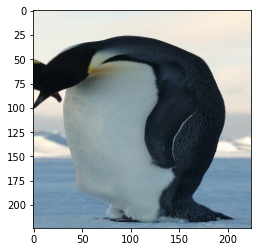

In [9]:
# visualizing the image
plt.imshow(plt.imread(root_dir))

##### converting the image to a numpy array and normalizing them.

In [10]:
def convert_image_to_numpy_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image,(256,256))
            image_array = img_to_array(image)
            return image_array
        else:
            return np.array([])
    except Exception  as error:
        print('Error: {}'.format(error))
        return None

In [19]:
image_list, label_list,all_imag_path = [],[],[]
for directory in bird_spec_dir:
    root_dir = f'{dirr}/{directory}'
    for image_name in os.listdir(root_dir):
        image_list.append(convert_image_to_numpy_array(f'{root_dir}/{image_name}'))
        label_list.append(directory)
        all_imag_path.append(f'{dirr}/{directory}/{image_name}')
    

In [20]:
image_list[0],all_imag_path[0]

(array([[[ 93., 109., 116.],
         [ 94., 110., 117.],
         [ 95., 111., 118.],
         ...,
         [ 96., 111., 119.],
         [ 96., 112., 119.],
         [ 98., 114., 121.]],
 
        [[ 93., 109., 116.],
         [ 94., 110., 117.],
         [ 94., 110., 117.],
         ...,
         [ 95., 110., 118.],
         [ 95., 111., 118.],
         [ 96., 112., 119.]],
 
        [[ 93., 108., 117.],
         [ 94., 109., 117.],
         [ 93., 109., 117.],
         ...,
         [ 96., 112., 120.],
         [ 97., 113., 120.],
         [ 98., 114., 121.]],
 
        ...,
 
        [[ 79.,  95.,  94.],
         [ 78.,  94.,  93.],
         [ 77.,  92.,  93.],
         ...,
         [153., 156., 161.],
         [153., 156., 160.],
         [153., 156., 160.]],
 
        [[ 83.,  97.,  96.],
         [ 81.,  95.,  94.],
         [ 78.,  93.,  94.],
         ...,
         [153., 156., 160.],
         [152., 156., 160.],
         [152., 155., 159.]],
 
        [[ 84.,  98.,  97.],
 

#### checking class imbalace 

In [21]:
len(image_list),len(label_list)

(811, 811)

In [22]:
class_balance = pd.DataFrame(label_list)
class_balance.value_counts()


AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

##### visualizing different bird species  birds 


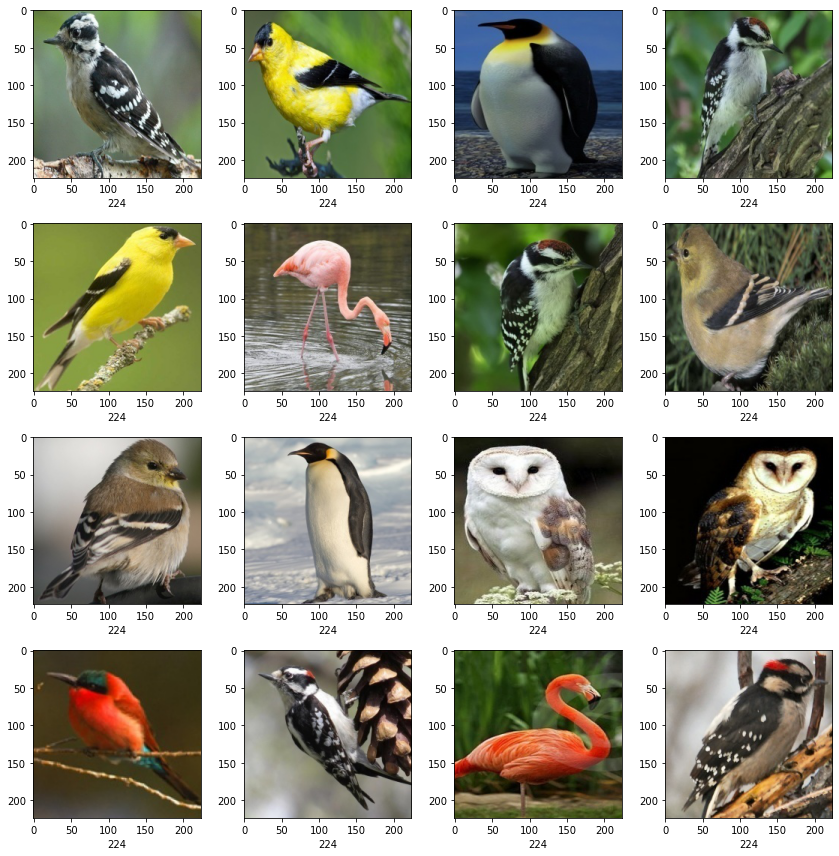

In [24]:
plt.figure(figsize=(12,12))
rand_path = random.choices(all_imag_path,k=16)
for idx , img_path in enumerate(rand_path):
    plt.subplot(4,4,idx+1)
    plt.tight_layout()
    # displaying the image, rand_img is a numpy data 
    img = imread(img_path)
    plt.imshow(img)
   
    plt.xlabel(img.shape[1],fontsize=10) # WIDTH OF THE IMAGE
    plt.xlabel(img.shape[0],fontsize=10) # HEIGHT OF THE IMAGE

checking the shape of our image

In [25]:
image_list[0].shape

(256, 256, 3)

we now know that all our images and label is 811 with each having a shape of (256,256,3)
   

##### splitting our data into training and test

In [26]:
X_train,X_test,y_train,y_test = train_test_split(image_list,label_list,test_size=0.2,random_state=0)

#### Normalizing the datasets

In [27]:
X_train = np.array(X_train,dtype = np.float16)/255
X_test = np.array(X_test,dtype = np.float16)/255

##### we will one-hot encode our labels, binarizing our labels using LabelBinarizer

In [28]:
lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [29]:
y_train[0]

array([1, 0, 0, 0, 0, 0])

##### spliting training  set into training  and validation dataset

In [30]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

#### Creating Neural Network model

In [31]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3, 3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(32,(3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(len(bird_spec_dir),activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0

##### compiling the model

when compiling models , i need to choose a loss function and an optimizer.
the loss function is the quantity that will be minimized during training.
the optimizer determines determines how the network will be updated based on the loss function.

In [32]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

Using callbacks and early stop for our model, to aviod overfitting of the model

In [33]:
from tensorflow.keras import callbacks 

In [34]:
check_point = callbacks.ModelCheckpoint('bird_specie_prediction',save_best_only=True)
earlystopping = callbacks.EarlyStopping(patience=10,restore_best_weights=True)

###### Training the model 

using 60 epochs, batch_size of 128, we will now train the model.


In [ ]:
epochs = 60
batch_size = 128
model_history = model.fit(X_train,
                          y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(X_val,y_val),
                          callbacks=[check_point,earlystopping])

Epoch 1/60
4/4 [==============================] - 31s 7s/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.4017 - val_accuracy: 0.8750
INFO:tensorflow:Assets written to: bird_specie_prediction\assets
Epoch 2/60
4/4 [==============================] - 37s 9s/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.2864 - val_accuracy: 0.9135
INFO:tensorflow:Assets written to: bird_specie_prediction\assets
Epoch 3/60
4/4 [==============================] - 35s 8s/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.4212 - val_accuracy: 0.8654
Epoch 4/60
4/4 [==============================] - 32s 7s/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.3388 - val_accuracy: 0.8942
Epoch 5/60
4/4 [==============================] - 28s 7s/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.3471 - val_accuracy: 0.8846
Epoch 6/60
4/4 [==============================] - 30s 7s/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.3227 - val_accuracy: 0.9135
Epoch 7/60
4/4 [==========================

##### checking the loss and accuracy of the data

In [35]:
loss_accu =pd.DataFrame(model_history.history)

NameError: name 'model_history' is not defined

#### visualizing thte loss and accuracy of the model

Text(0, 0.5, 'accuracy/loss')

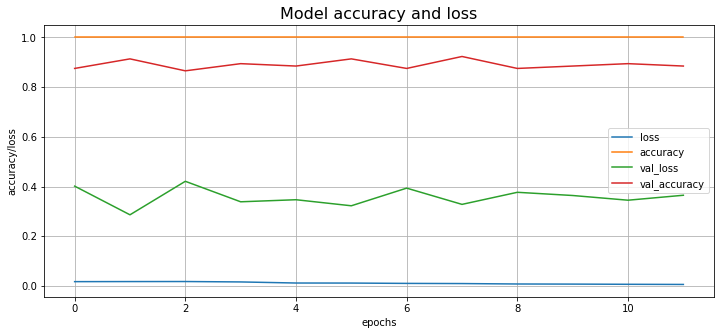

In [ ]:
loss_accu.plot(figsize=(12,5))
plt.grid(True)
plt.title('Model accuracy and loss',fontsize=16,)
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')

#### saving model as .h5

In [ ]:
model.save(os.getcwd()+'\\'+'bird_specie_prediction.h5')

#### saving model as a json file and also saving the weight of the model as .h5 file

In [ ]:
json_model = model.to_json()
with open(os.getcwd()+'\\'+'bird_specie_prediction.json','w') as json_file:
    json_file.write(json_model)
model.save_weights(os.getcwd()+'\\'+'bird_specie_prediction_weight.h5')

Evaluating test data

In [ ]:
scores = model.evaluate(X_test,y_test)

6/6 [==============================] - 2s 246ms/step - loss: 0.3233 - accuracy: 0.8896


In [ ]:
from tensorflow.keras.models import load_model
file_name = 'bird_specie_prediction.h5'
model = load_model(f'plant_disease_detector/{file_name}')

predicting......

In [ ]:
r = np.array([X_test[0]])
r.shape

(1, 256, 256, 3)

In [ ]:
pred = model.predict(r)

In [ ]:
pred

array([[3.1483185e-05, 6.9846300e-04, 3.6557722e-05, 4.4752433e-05,
        9.9869859e-01, 4.9009506e-04]], dtype=float32)

In [ ]:
pred.round(1)[0:5]

array([[0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

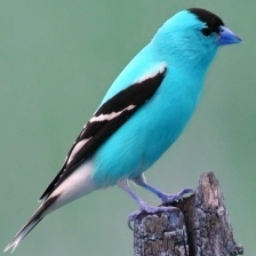

In [ ]:
img = array_to_img(X_test[5])
img

In [ ]:
labels = lb.classes_
labels

array(['AMERICAN GOLDFINCH', 'BARN OWL', 'CARMINE BEE-EATER',
       'DOWNY WOODPECKER', 'EMPEROR PENGUIN', 'FLAMINGO'], dtype='<U18')

In [ ]:
print('original plant: ',labels[np.argmax(y_test[10])])
print('predicted plant: ',labels[np.argmax(pred[10])])


original plant:  EMPEROR PENGUIN
predicted plant:  EMPEROR PENGUIN


In [ ]:
from tensorflow.keras.models import load_model

modell = load_model(os.getcwd()+'\\'+'bird_specie_prediction.h5')
modell.predict(r)

array([[3.1483185e-05, 6.9846300e-04, 3.6557722e-05, 4.4752433e-05,
        9.9869859e-01, 4.9009506e-04]], dtype=float32)

In [ ]:
r.round(3)

array([[[[0.67 , 0.435, 0.231],
         [0.67 , 0.435, 0.231],
         [0.67 , 0.435, 0.231],
         ...,
         [0.666, 0.432, 0.227],
         [0.666, 0.432, 0.227],
         [0.666, 0.432, 0.227]],

        [[0.67 , 0.435, 0.231],
         [0.67 , 0.435, 0.231],
         [0.67 , 0.435, 0.231],
         ...,
         [0.666, 0.432, 0.227],
         [0.666, 0.432, 0.227],
         [0.666, 0.432, 0.227]],

        [[0.67 , 0.435, 0.231],
         [0.67 , 0.435, 0.231],
         [0.67 , 0.435, 0.231],
         ...,
         [0.666, 0.432, 0.227],
         [0.67 , 0.435, 0.231],
         [0.67 , 0.435, 0.231]],

        ...,

        [[0.655, 0.584, 0.573],
         [0.666, 0.6  , 0.588],
         [0.674, 0.604, 0.596],
         ...,
         [0.686, 0.604, 0.584],
         [0.694, 0.608, 0.588],
         [0.694, 0.608, 0.588]],

        [[0.69 , 0.612, 0.604],
         [0.698, 0.624, 0.612],
         [0.698, 0.624, 0.612],
         ...,
         [0.686, 0.6  , 0.58 ],
         [0.